# Focal mechanism calculation using `SKHASH` file format

**Make P-polarity input file i.e., `pol_consensus.csv` file.**

columns:\
        `event_id,event_id2,station,location,channel,p_polarity,origin_latitude,origin_longitude,origin_depth_km`



**pyrocko marker to skshash pol_concensus for individual event marker file.
This is my old  filing system. I make 1 marker file for one event. Now, i have a master marker file for all events.**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyperclip

from classes_functions.my_class_funcs import SkhashRunner
%reload_ext autoreload
%autoreload 2

# Set up directory
project_dir = f"{os.getcwd()}/.."
skhash_dir = f"{project_dir}/code/SKHASH2/SKHASH" # /examples" #/maacama_SKHASH_MTJ"
sk_in_out_dir = f'{project_dir}/results/foc_mech/NCEDC_comp/HASH_IN_OUT'

eq_cat_file = f'../data/NCEDC_picks/NCEDC_eq_cat_above_slab.csv'
inv_file = f'../data/eq_data/3_station_catalogs/00_station_inventory_master.txt'

# Create SkHASH format files

In [2]:
out_id = "NCEDC_PN_noQC_2008"    
output_path  = f'{sk_in_out_dir}/IN'
os.makedirs(output_path, exist_ok=True)
# **************** Very important to change this for each run ****************

%reload_ext autoreload
%autoreload 2
from classes_functions.my_class_funcs import SkhashRunner

skrun = SkhashRunner()

### Polarity file [SKHASH format]


In [3]:
nc_picks_file = f'{project_dir}/data/NCEDC_picks/2008_NCEDC_picks_above_slab_PN.csv'
skhash_pol_df = skrun.NCEDC2SKHASH_polarity(
    eq_cat_file,
    nc_picks_file,
)

### Station file [SKHASH format]


In [4]:
# inv_file = f'../data/eq_data/3_station_catalogs/00_station_inventory_master.txt'
skhash_station_df = skrun.make_SKHASH_station_file(
    given_inventory='./temp_inv.txt',
    keep_Z_only = True, 
    drop_duplicates = True,
    )

skhash_station_df.head()

Using the provided merged inventory file: ./temp_inv.txt


,station,location,channel,latitude,longitude,elevation
1885,1010,CC,HNZ,39.81580,-122.33594,156.0
1886,1010,D2,HNZ,39.81796,-122.33601,119.0
1887,1010,LT,HNZ,39.81384,-122.33770,123.0
1889,1010,RA,HNZ,39.81258,-122.33628,161.0
1890,1010,UT,HNZ,39.81384,-122.33770,152.0


##  Fix missisng locations problem

## Write out polarity and station files

In [5]:
pol_file = f"{output_path}/pol_concensus_{out_id}.csv"
skhash_pol_df.to_csv(pol_file, index=False)
print(f"Saved to {pol_file}")

sta_file = f"{output_path}/station_master.csv"
skhash_station_df.to_csv(sta_file, index=False)
print(f"Saved to {sta_file}")

Saved to /Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../results/foc_mech/NCEDC_comp/HASH_IN_OUT/IN/pol_concensus_NCEDC_PN_noQC_2008.csv
Saved to /Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../results/foc_mech/NCEDC_comp/HASH_IN_OUT/IN/station_master.csv


### Reverse file [SKHASH format]


### Make control file [SKHASH format]

In [6]:
sk_out_dir = f'{sk_in_out_dir}/OUT'
control_file = skrun.edit_skhash_control_file(
    # input files
    conpfile = pol_file,
    stfile = sta_file,
    vmodel_paths = f'{sk_in_out_dir}/IN/vz.MTJ.txt',

    # output files
    outfile1 = f'{sk_out_dir}/out_{out_id}.csv',
    outfile2 = f'{sk_out_dir}/out2_{out_id}.csv',
    outfile_pol_agree = f'{sk_out_dir}/out_polagree_{out_id}.csv',
    outfile_pol_info = f'{sk_out_dir}/out_polinfo_{out_id}.csv',
    outfolder_plots = f'{sk_out_dir}/plots_{out_id}',

    delmax = 150, # magnitude variable pick files are used, so this doesn't matter
    plot_station_names = True,
    plot_acceptable_solutions = True,
)

### Write control file

In [7]:
# write the control file into a text file   
control_file_path = f'{sk_in_out_dir}/controlfile_{out_id}.txt'
with open(control_file_path, 'w') as f:
    f.write(control_file)

print(control_file_path)

/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../results/foc_mech/NCEDC_comp/HASH_IN_OUT/controlfile_NCEDC_PN_noQC_2008.txt


# Run SkHash in bash
cd into SkHash folder and run the following code in terminal

In [10]:
bash_script = f"""#!/bin/bash
cd {skhash_dir}

# Activate conda pythoon environment named 'obspy' [********change miniconda3 to anaconda3 if using Anaconda]
source ~/miniconda3/etc/profile.d/conda.sh # or source ~/anaconda3/etc/profile.d/conda.sh in case of Anaconda
# conda init
conda activate obspy

python3 SKHASH.py {control_file_path}
"""

with open(f'{sk_in_out_dir}/run_skhash_{out_id}.sh', 'w') as f:
    f.write(bash_script)

# Make the script executable
print("Making the script executable...")
os.system(f"chmod +x {sk_in_out_dir}/run_skhash_{out_id}.sh")

Making the script executable...


0

In [11]:
# Run the script
run = input("Do you want to run SkHASH now? (y/n): ")
# run = "y"
if run.lower() == "y":
    print("Running SKHASH...")
    os.system(f"{sk_in_out_dir}/run_skhash_{out_id}.sh")
else:
    print("SKHASH will not be run. Exiting...")

Running SKHASH...
SKHASH v0.1 (2024-02-16)
Control file: /Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../results/foc_mech/NCEDC_comp/HASH_IN_OUT/controlfile_NCEDC_PN_noQC_2008.txt


Traceback (most recent call last):
  File "/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/SKHASH2/SKHASH/SKHASH.py", line 323, in <module>
    pol_df=in_sta.apply_station_locations(pol_df,station_df,p_dict)
  File "/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/SKHASH2/SKHASH/functions/in_sta.py", line 121, in apply_station_locations
    raise ValueError('Missing metadata for {} measurements. Example missing stations:\n{}'.format(num_missing_sta,missing_sta_df.head(10).to_string()))
ValueError: Missing metadata for 195 measurements. Example missing stations:
0     KCS.--.SH
1     KCR.--.SH
2    ME30.01.BH
3    KHMB.--.HH
4    KHBB.--.HH
5     KPP.--.SH
6    ME39.01.BH
7    ME08.01.BH
8     KKP.--.SH
9     KSM.--.SH


In [118]:
# check the output file
out_file = f'{sk_out_dir}/out_{out_id}.csv'
out_df = pd.read_csv(out_file).sort_values('quality', ascending=False, ignore_index=True)
print(out_file)
out_df.head()

/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../code/SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/NCEDC/OUT/out_NCEDC_2008.csv


,event_id,strike,dip,rake,quality,fault_plane_uncertainty,aux_plane_uncertainty,num_p_pol,num_sp_ratios,polarity_misfit,prob_mech,sta_distribution_ratio,sp_misfit,mult_solution_flag
0,nc40210243,308.2631,57.5293,-154.5590,D,45.4795,43.2847,11,0,29.7,37.8,43.6,0.0,True
1,nc51211334,133.0376,44.2839,-56.7493,D,47.1709,43.5931,15,0,20.0,35.6,40.3,0.0,True
2,nc71107796,309.9583,56.3529,142.8182,D,43.8946,45.7484,14,0,24.9,31.4,39.2,0.0,True
3,nc71104416,345.2415,72.5140,-141.1189,D,47.2383,45.4418,12,0,19.3,28.4,35.7,0.0,False
4,nc71103341,95.9428,68.5420,175.2417,D,41.6225,42.9019,9,0,0.0,37.4,62.6,0.0,False


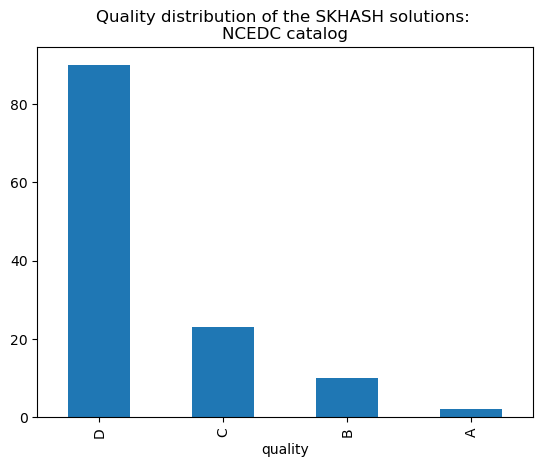

In [117]:
# each group how much percentage of the total
out_df['quality'].value_counts(normalize=False).plot(kind='bar')
plt.title('Quality distribution of the SKHASH solutions: \nNCEDC catalog + PhaseNet picks')

plt.show()